# NSDF Queries


## Notes

Some simple exploration of the basic graphs propertis.  


## Setup and inits

### Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import json

/home/fils/.local/lib/python3.10/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


### Support Functions

In [2]:
sparqlep = "http://localhost:7878/query"

In [3]:
#@title
def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

## Queries

What follows is a set of queries designed to provide a feel for the OIH graph

### Type Count

How many types are there?

In [4]:
rq_pcount = """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>

SELECT ?o (COUNT(?o) as ?oCount)
WHERE
{
    graph ?g { ?s <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?o} .
}
GROUP BY ?o
"""
dfc = get_sparql_dataframe(sparqlep, rq_pcount)
dfc['oCount'] = dfc["oCount"].astype(int) # convert count to int
# dfc.set_index('p', inplace=True)
dfc_sorted = dfc.sort_values('oCount', ascending=False)
dfc_sorted.head(40)

,o,oCount
7,http://schema.org/DataDownload,973748
2,http://schema.org/Organization,348233
6,http://schema.org/Person,247262
4,http://schema.org/Dataset,94023
1,http://schema.org/CreativeWork,60155
5,http://schema.org/DataCatalog,31287
3,http://schema.org/Place,303
0,http://schema.org/GeoShape,172
8,http://schema.org/GeoCoordinates,131


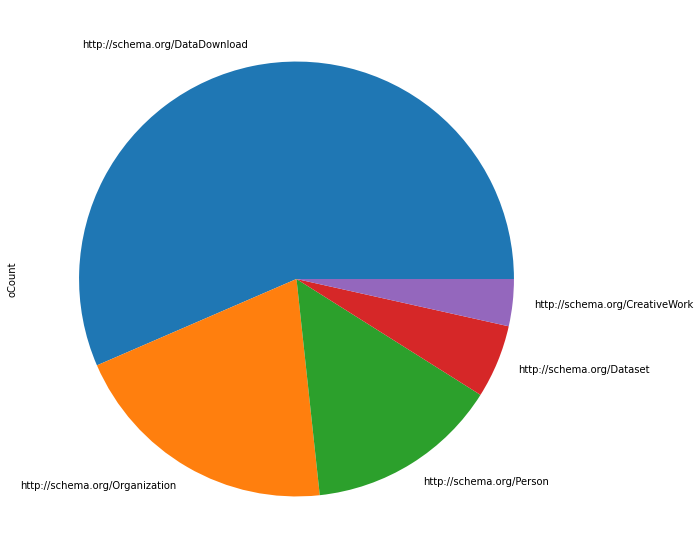

In [5]:
rcount = len(dfc_sorted)
ts = dfc_sorted.tail(38)['oCount'].sum()


hs = dfc_sorted.head(5)
hs.append({'o':'Other','oCount':ts}, ignore_index=True)
hs.set_index('o', inplace=True)

plot = hs.plot.pie(y='oCount',x='o',legend=False, figsize=(10, 10))


### Predicate Counts

This gives an overview of unique predicates that connect a subject to an object.  This gives us both an idea of the properties we are using on things and count of their usage.


In [6]:
rq_pcount = """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>

SELECT ?p (COUNT(?p) as ?pCount)
WHERE
{
 graph ?g { ?s ?p ?o} .
}
GROUP BY ?p
"""
dfc = get_sparql_dataframe(sparqlep, rq_pcount)
dfc['pCount'] = dfc["pCount"].astype(int) # convert count to int
# dfc.set_index('p', inplace=True)
dfc_sorted = dfc.sort_values('pCount', ascending=False)
dfc_sorted.head(40)

,p,pCount
35,http://schema.org/name,1804227
5,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,1755314
16,http://schema.org/distribution,973748
28,http://schema.org/contentUrl,947412
8,http://schema.org/contentSize,926206
21,http://schema.org/fileFormat,912198
11,http://schema.org/description,474670
32,http://schema.org/keywords,468037
29,http://schema.org/identifier,460503
30,http://schema.org/affiliation,322236


In [7]:
# Looking at the top 10 predicates and seeing the counts for them
rcount = len(dfc_sorted)
ts = dfc_sorted.tail(38)['pCount'].sum()


hs = dfc_sorted.head(10)
hs.append({'p':'Other','pCount':ts}, ignore_index=True) 
hs.set_index('p', inplace=True)
# hs.head(10)

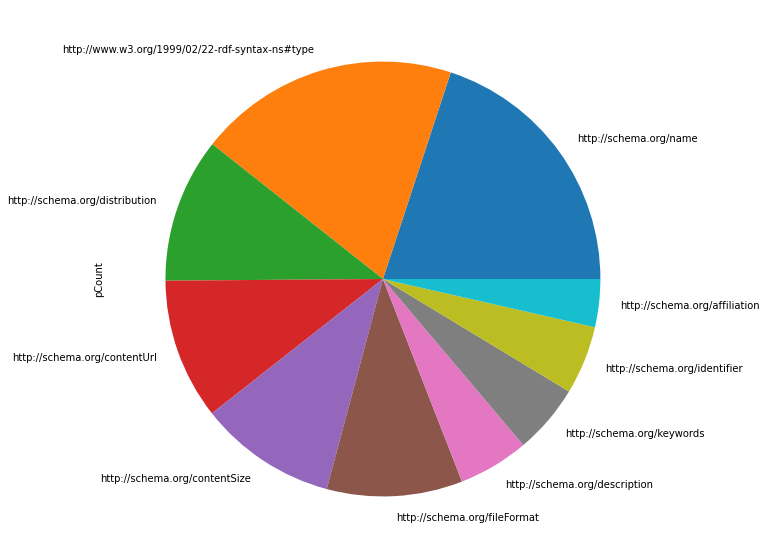

In [8]:
plot = hs.plot.pie(y='pCount',x='p',legend=False, figsize=(10, 10))